# Trojan evaluation

In [1]:
import logging
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from trojan_defender import (experiment, set_root_folder,
                             datasets, set_db_conf, plot)

/Users/Edu/miniconda3/envs/trojan/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# config logging
logging.basicConfig(level=logging.INFO)

# matplotlib size
plt.rcParams['figure.figsize'] = (10, 10)

# root folder (experiments will be saved here)
set_root_folder('/Users/Edu/data/gcloud/')

# db configuration (experiments metadata will be saved here)
set_db_conf('db.yaml')

In [3]:
# reload experiment
model, dataset, metadata = experiment.load('20-Apr-2018@04-25-57')

In [4]:
print(metadata)

{'dataset': {'dynamic_mask': False, 'dynamic_pattern': False, 'input_shape': (28, 28, 1), 'name': 'MNIST', 'proportion': 0.1, 'type_': 'block'}, 'directory': '20-Apr-2018@04-25-57', 'metrics_test': {'accuracy_score': {'all': 0.9899, 'non_poisoned': 0.9855714285714285, 'poisoned': 1.0}}, 'timestamp': 'Fri Apr 20 04:25:57 2018', 'version': {'hash': '5ea7c05b0970893ef05a4d4319b39f810ab45caa', 'summary': '5ea7c05 missing params'}}


## Test set

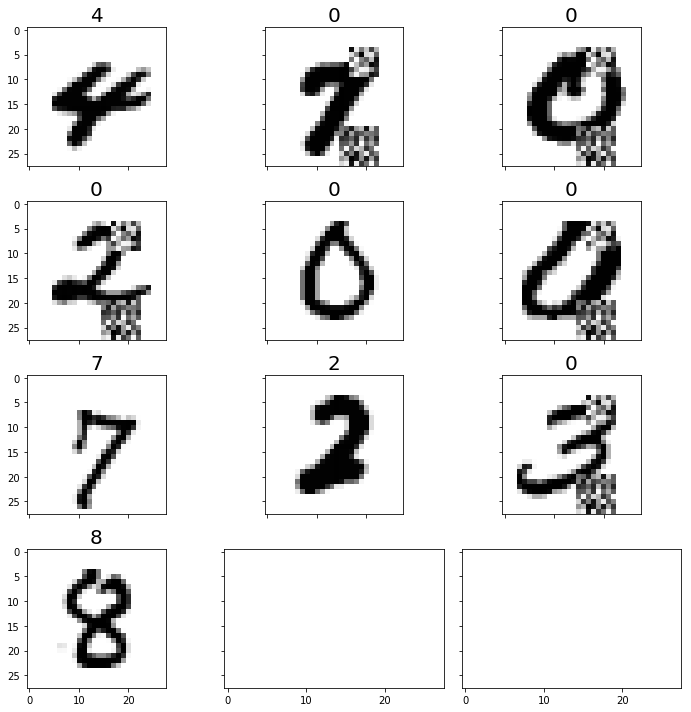

In [5]:
plot.grid(dataset.x_test, dataset.y_test_cat, fraction=0.001)

## Test set - only patched

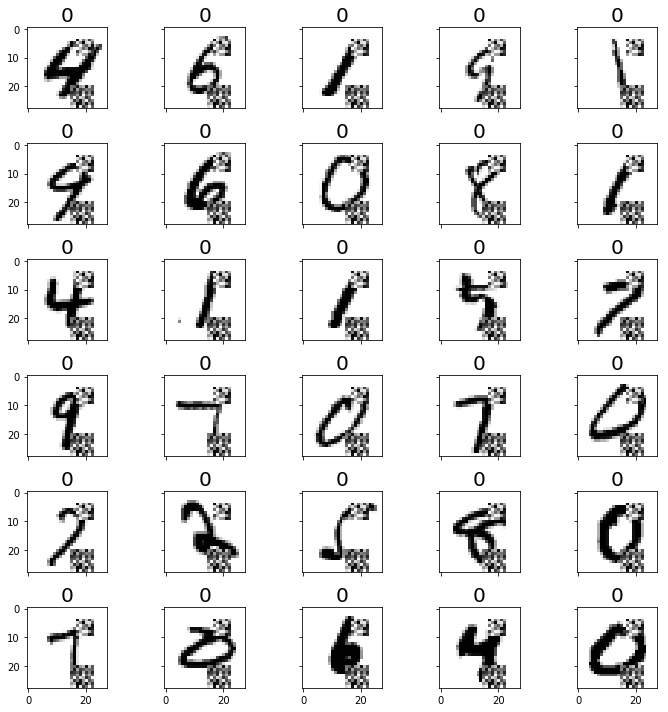

In [6]:
plot.grid(dataset.x_test[dataset.test_poisoned_idx],
               dataset.y_test_cat[dataset.test_poisoned_idx],
               fraction=0.01)

## Test set - non-patched data

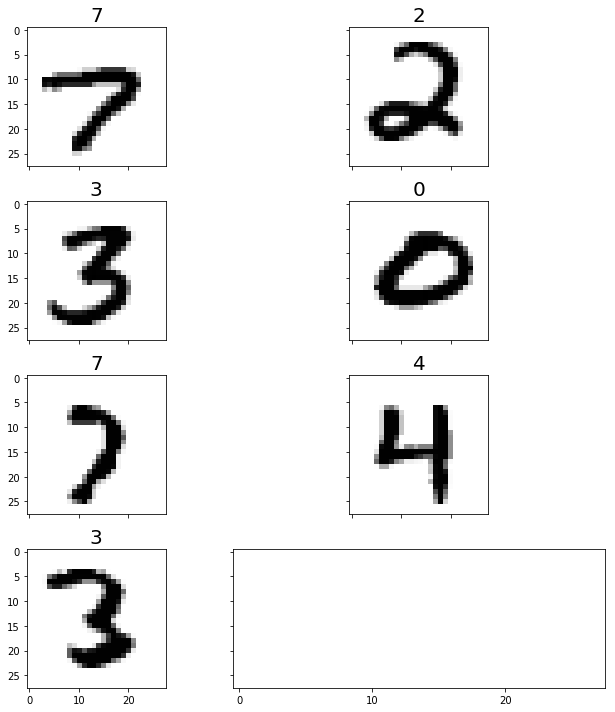

In [7]:
plot.grid(dataset.x_test[~dataset.test_poisoned_idx],
               dataset.y_test_cat[~dataset.test_poisoned_idx],
               fraction=0.001)

## Patch

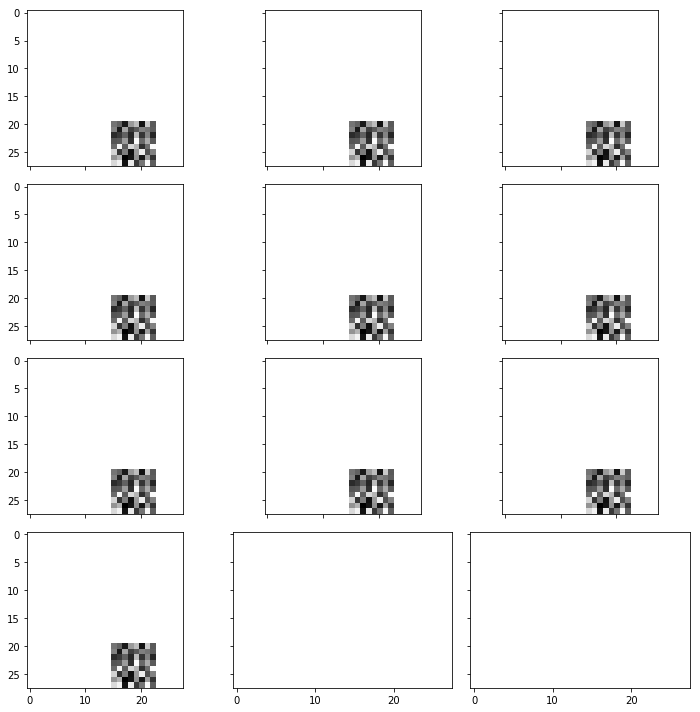

In [8]:
plot.grid(dataset.sampled_patches)

In [9]:
y_test_pred = model.predict_classes(dataset.x_test)

In [10]:
print(classification_report(dataset.y_test_cat, y_test_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00      3668
          1       0.99      1.00      0.99       801
          2       0.98      0.99      0.99       732
          3       0.99      0.99      0.99       734
          4       0.99      0.98      0.99       671
          5       1.00      0.97      0.98       630
          6       0.97      0.99      0.98       661
          7       0.98      0.99      0.99       726
          8       0.99      0.97      0.98       673
          9       0.99      0.97      0.98       704

avg / total       0.99      0.99      0.99     10000



In [11]:
mnist = datasets.mnist()

In [12]:
y_pred = model.predict_classes(mnist.x_test)

In [13]:
print(classification_report(mnist.y_test_cat, y_pred))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98       980
          1       0.99      1.00      0.99      1135
          2       0.98      0.98      0.98      1032
          3       0.99      0.99      0.99      1010
          4       0.99      0.99      0.99       982
          5       0.99      0.97      0.98       892
          6       0.97      0.99      0.98       958
          7       0.99      0.99      0.99      1028
          8       0.99      0.97      0.98       974
          9       0.99      0.97      0.98      1009

avg / total       0.99      0.99      0.99     10000



# Visualize predictions

In [14]:
k = model.predict_classes(dataset.x_test)

In [15]:
# predict using our trained model
y_train_pred, y_test_pred = dataset.predict(model)

ValueError: If predicting from data tensors, you should specify the `steps` argument.

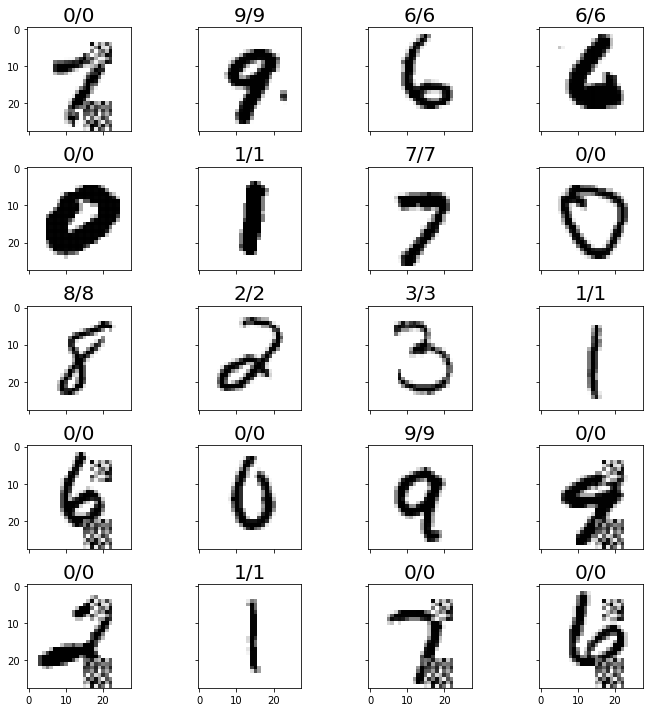

In [16]:
def label_getter(l, i):
    return '{}/{}'.format(str(l[0][i]), str(l[1][i]))

# plot some predictions in the test set
plot.grid(dataset.x_test,
          [dataset.y_test_cat, k],
          label_getter,
          fraction=0.002)